In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train=pd.read_csv('../lab-2.01-titanic/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.Create a bar chart showing how many missing values are in each column

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

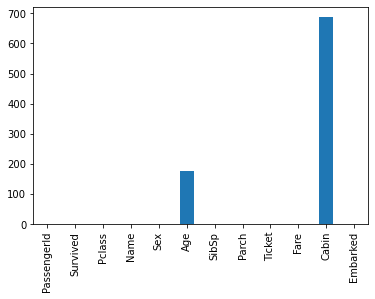

In [6]:
train.isnull().sum().plot(kind='bar')

In [7]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

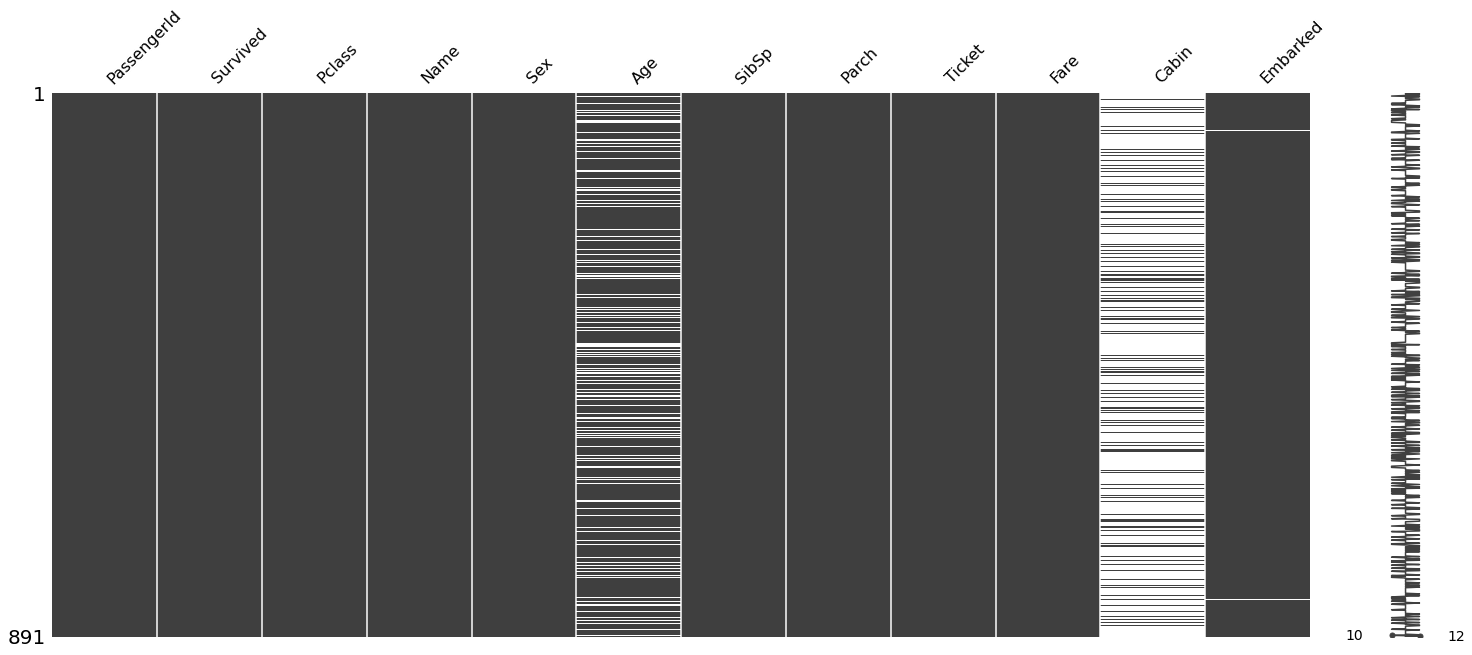

In [8]:
msno.matrix(train)

2.Which column has the most NaN values? How many cells in that column are empty?

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

cabin column got the most NaN values.687 cells in the column are empty.

3.Delete all rows where Embarked is empty

In [17]:
t=train['Embarked']
t

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [18]:
t.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
t.dropna(how='any',inplace=True)

In [20]:
t.isnull().sum()

0

4.Fill all empty cabins with ¯\(ツ)/¯

In [36]:
train['Cabin'].fillna('¯(ツ)/¯',inplace=True)

In [37]:
train['Cabin'].isnull().sum()

0

1.There are two columns that pertain to how many family members are on the boat for a given person. 
Create a new column called FamilyCount which will be the sum of those two columns.

In [38]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
train['FamiliyCount']= train['SibSp'] + train['Parch']

In [40]:
train['FamiliyCount']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamiliyCount, Length: 891, dtype: int64

2.Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [41]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [42]:
# The Reverend 

def rever(string):
    if 'Rev.' in string:
        return 1
    else:
        return 0

In [43]:
train['Name'].apply(lambda x : rever(x))

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    0
Name: Name, Length: 891, dtype: int64

In [44]:
train['IsReverend'] = train['Name'].apply(lambda x : rever(x))

In [45]:
train['IsReverend']

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    0
Name: IsReverend, Length: 891, dtype: int64

Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column

In [46]:
pd.get_dummies(data=train,columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamiliyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯(ツ)/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯(ツ)/¯,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯(ツ)/¯,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯(ツ)/¯,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0,1,0,0


Do the same thing for Sex

In [47]:
pd.get_dummies(data=train,columns=['Sex'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiliyCount,IsReverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯(ツ)/¯,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯(ツ)/¯,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,¯(ツ)/¯,S,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,¯(ツ)/¯,S,3,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,0,0,1


BONUS: Extract the title from everyone's name and create dummy columns

In [48]:
train['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [49]:
def title(string):
    if 'Mr.' in string:
        return 'Mr'
    elif 'Mrs.' in string:
        return 'Mrs'
    elif 'Miss.' in string:
        return 'Miss'
    elif 'Rev.' in string:
        return 'Rev'
    elif 'Master.' in string:
        return 'Mast'

In [50]:
train['title']=train['Name'].apply(lambda x : title(x))
train['title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [51]:
pd.get_dummies(data=train,columns=['title']).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiliyCount,IsReverend,title_Mast,title_Miss,title_Mr,title_Mrs,title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,S,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯(ツ)/¯,S,0,0,0,1,0,0,0


In [52]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiliyCount,IsReverend,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs


What was the survival rate overall?

In [53]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [54]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

38.38% survival rate.

In [55]:
# Which gender fared the worst? What was their survival rate?

In [56]:
train[['Sex','Survived']].value_counts(normalize=True)

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
dtype: float64

Male gender fared the worst with a survival rate of 12.23%.

In [57]:
#What was the survival rate for each Pclass?

In [58]:
train[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [59]:
d1=train[['Pclass','Survived']].groupby('Pclass').sum()
d1

,Survived
Pclass,
1,136
2,87
3,119


for Pclass 1-136 survived,
Pclass 2-87 survived,
Pclass 3-119 survived

In [60]:
d1['per']=100 * (d1['Survived']/sum(d1['Survived']))
d1

,Survived,per
Pclass,,
1,136,39.766082
2,87,25.438596
3,119,34.795322


for Pclass 1-39.7 is the rate, Pclass 2- 25.43, Pclass 3-34.79

In [61]:
#Did any reverends survive? How many?

In [62]:
train[['IsReverend','Survived']]

,IsReverend,Survived
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
886,1,0
887,0,1
888,0,0
889,0,1


In [63]:
train[['IsReverend','Survived']].groupby('IsReverend').sum()

,Survived
IsReverend,
0,342
1,0


No Reverend survived.

In [64]:
#What is the survival rate for cabins marked ¯\(ツ)/¯

In [65]:
train[['Cabin','Survived']].value_counts(normalize=True)

Cabin    Survived
¯(ツ)/¯   0           0.539843
         1           0.231201
B96 B98  1           0.004489
F33      1           0.003367
E101     1           0.003367
                       ...   
C123     1           0.001122
C128     0           0.001122
C148     1           0.001122
C2       0           0.001122
C65      1           0.001122
Length: 165, dtype: float64

23.12 is the survival rate

In [66]:
#What is the survival rate for people whose Age is empty?

In [67]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [68]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [69]:
train[train['Age'].isnull()].value_counts('Survived',normalize=True)

Survived
0    0.706215
1    0.293785
dtype: float64

In [70]:
#What is the survival rate for each port of embarkation?


In [71]:
t=train[['Embarked','Survived']].groupby('Embarked').sum()
t

,Survived
Embarked,
C,93
Q,30
S,217


In [72]:
(t['Survived']/sum(t['Survived'])) * 100

Embarked
C    27.352941
Q     8.823529
S    63.823529
Name: Survived, dtype: float64

In [73]:
#What is the survival rate for children (under 12) in each Pclass?

In [74]:
a=train[train['Age'] < 12].groupby('Pclass').sum()
a

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamiliyCount,IsReverend
Pclass,,,,,,,,
1,1853,3,17.92,3,8,504.9583,11,0
2,7671,17,59.33,14,23,488.5834,37,0
3,20188,19,239.92,111,66,1171.2249,177,0


In [75]:
som=a['Survived'].sum()
per=a['Survived'].apply(lambda x : (x/som)*100)
per

Pclass
1     7.692308
2    43.589744
3    48.717949
Name: Survived, dtype: float64

In [76]:
#Did the captain of the ship survive? Is he on the list?

In [77]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiliyCount,IsReverend,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs


In [78]:
def captain(string):
    if 'captain' in string.lower():
        return 1
    else:
        return 0
    

In [80]:
train['Name'].apply(lambda x : captain(x)).value_counts()

0    891
Name: Name, dtype: int64

no captain's name is not in the list.

In [82]:
#Of all the people that died, who had the most expensive ticket? How much did it cost

In [83]:
train[train['Survived']==0].sort_values('Fare',ascending=False).head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiliyCount,IsReverend,title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5,0,Mr
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5,0,Mr
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1,0,Mr
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,¯(ツ)/¯,C,0,0,Mr
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0,0,Mr


Fortune, Mr. Charles Alexander,Fortune, Mr. Mark has the most expensive tickets.cost=263

In [85]:
#Does having family on the boat help or hurt your chances of survival

In [86]:
df=train[['Survived','FamiliyCount']]

In [87]:
df

,Survived,FamiliyCount
0,0,1
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
886,0,0
887,1,0
888,0,3
889,1,0


In [88]:
df.groupby('Survived').value_counts()

Survived  FamiliyCount
0         0               374
          1                72
          2                43
          5                19
          4                12
          3                 8
          6                 8
          10                7
          7                 6
1         0               163
          1                89
          2                59
          3                21
          6                 4
          4                 3
          5                 3
dtype: int64

In [89]:
df.groupby('Survived').sum()

,FamiliyCount
Survived,
0,485
1,321


family on the boat might hurt your chances of survival.

having family on the boat might hurt your chances of survival.

In [91]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiliyCount,IsReverend,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,S,1,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯(ツ)/¯,S,0,0,Miss


In [92]:
import seaborn as sns

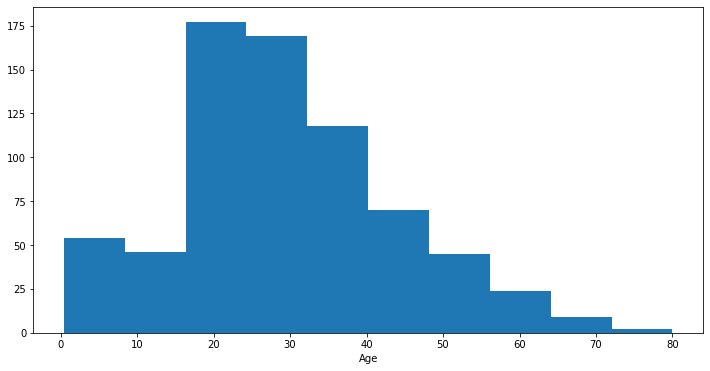

In [93]:
plt.figure(figsize=(12,6))
plt.xlabel('Age')
plt.hist('Age',bins=10,data=train);

In [94]:

d1=train[['Pclass','Survived']].groupby('Pclass').sum()
d1

,Survived
Pclass,
1,136
2,87
3,119


<BarContainer object of 3 artists>

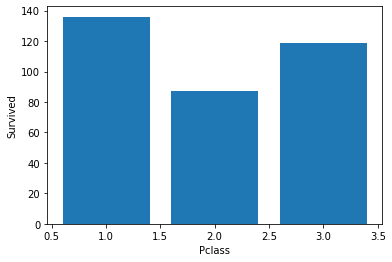

In [95]:
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.bar(d1.index,d1['Survived'])

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


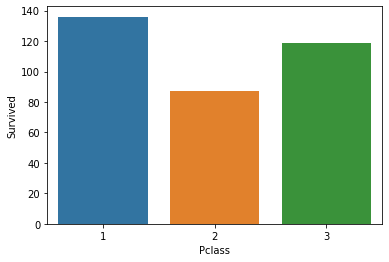

In [96]:
sns.barplot(d1.index,d1['Survived']);

<AxesSubplot:>

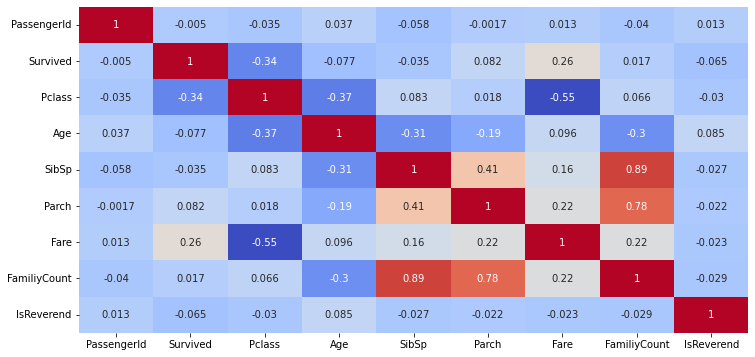

In [97]:
plt.figure(figsize=(12,6))
corr=train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar=False)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

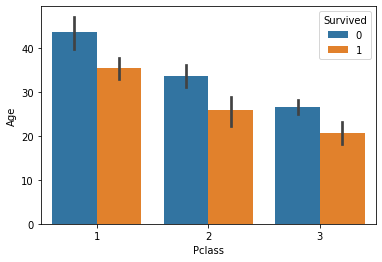

In [98]:
sns.barplot('Pclass','Age',hue='Survived',data=train)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='FamiliyCount'>

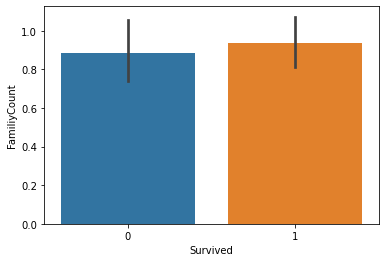

In [99]:
sns.barplot('Survived','FamiliyCount',data=train)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

<AxesSubplot:xlabel='title', ylabel='Survived'>

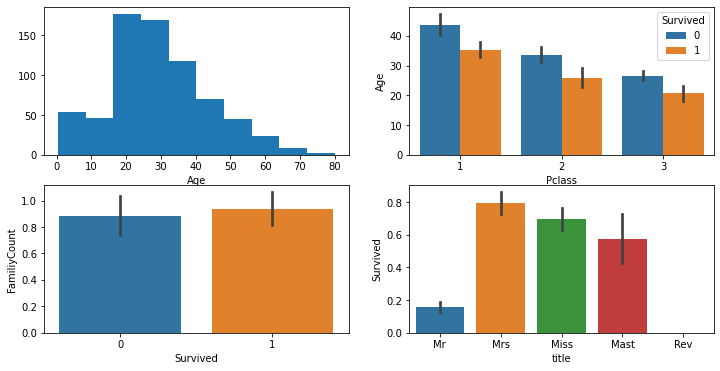

In [103]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(2,2,1)
ax1.hist('Age',data=train)
ax1.set_xlabel('Age')


ax2 = plt.subplot(2,2,2)
sns.barplot('Pclass','Age',hue='Survived',data=train)


ax3 = plt.subplot(2,2,3)
sns.barplot('Survived','FamiliyCount',data=train)                 
                 
ax4 = plt.subplot(2,2,4)
sns.barplot('title','Survived',data=train)